<a href="https://colab.research.google.com/github/wonkwonlee/likelion-k-digital-training-AI/blob/main/Python-and-Data-Visualization/tf-cnn-opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

#fashion_mnist - 의류 이미지/ 10개의 범주 / 흑백처리 / 28 * 28
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X,test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))


2.4.1
60000 10000


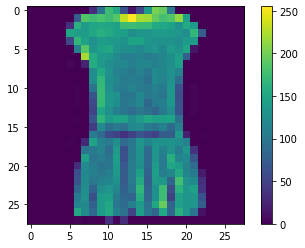

정답 범주 :  3


In [2]:
import matplotlib.pyplot as plt 
plt.imshow(train_X[3]) 
plt.colorbar()
plt.show()

# 정답 범주 확인
print("정답 범주 : ",train_Y[3])

In [3]:
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[0])

In [4]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)), 
                             tf.keras.layers.Dense(units=128,activation='relu'), 
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_X, train_Y,
                    epochs = 500,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6653 - accuracy: 0.7707 - val_loss: 0.4507 - val_accuracy: 0.8382
Epoch 2/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3941 - accuracy: 0.8590 - val_loss: 0.3945 - val_accuracy: 0.8599
Epoch 3/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3435 - accuracy: 0.8760 - val_loss: 0.3496 - val_accuracy: 0.8751
Epoch 4/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.8843 - val_loss: 0.3491 - val_accuracy: 0.8753
Epoch 5/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3014 - accuracy: 0.8887 - val_loss: 0.3541 - val_accuracy: 0.8705
Epoch 6/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.8922 - val_loss: 0.3336 - val_accuracy: 0.8827
Epoch 7/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9014 - val_loss: 0.3674 - val_ac

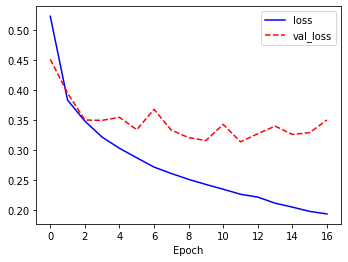

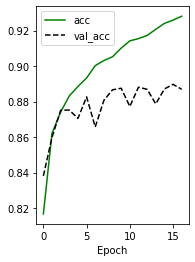

In [6]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss') 
plt.plot(history.history['val_loss'],'r--',label = 'val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2) 
plt.plot(history.history['accuracy'],'g-',label = 'acc') 
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8781


[0.39026719331741333, 0.8780999779701233]

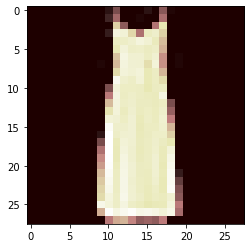

신경망의 예측 확률분포 
 [[1.0001165 1.0002426 1.0000868 1.9995267 1.0000046 1.0000008 1.0000168
  1.        1.0000037 1.0000015]]

 예측 범주:3 실제 범주:3 → 일치 여부 True


In [12]:
import numpy as np

#예측 수행
pred_X = model.predict(test_X[[13]]) 
#예측 이미지 확인 
plt.imshow(test_X[13], cmap = 'pink') 
plt.show()

#예측 결과 확인
pred_X_argmax = np.argmax(pred_X)
correct = np.equal(pred_X_argmax, test_Y[13])

print("신경망의 예측 확률분포 \n {}".format(pred_X + 1)) 
print("\n 예측 범주:{} 실제 범주:{} → 일치 여부 {}".format(pred_X_argmax, test_Y[13], correct))